In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from sklearn.datasets import make_blobs
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler



Perceptron para classificação

(100, 2) (100,)


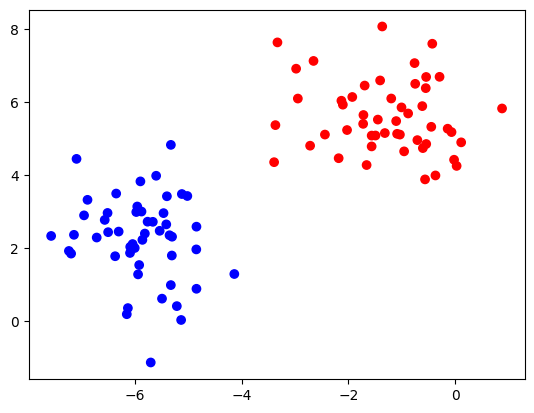

In [43]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

In [44]:
def plot_linear_classifier(x, y, w, b):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

    y_mesh = np.dot(x_mesh, np.array(w).reshape(1, -1).T) + b
    y_mesh = np.where(y_mesh <= 0, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

Python

w inicial: [0.34704543298877577, -0.19592846291344723]
b inicial: 0.3944672728275911
step 0: 6
step 10: 0
step 20: 0
step 30: 0
step 40: 0
step 50: 0
step 60: 0
step 70: 0
step 80: 0
step 90: 0
w final: [1.3069758100227116, 1.1394063434985955]
b final: 0.49446727282759106
Predições: [ True False False  True  True False  True False  True  True False  True
 False False False False  True  True False  True False  True  True  True
 False  True False  True  True  True  True  True False False False  True
  True  True False False False False False  True False  True  True  True
 False  True  True False False False False  True  True  True  True  True
  True False  True  True  True False False  True False  True False False
  True False False  True False  True False  True False False False False
  True False  True False  True  True  True False False False False False
  True  True False False]


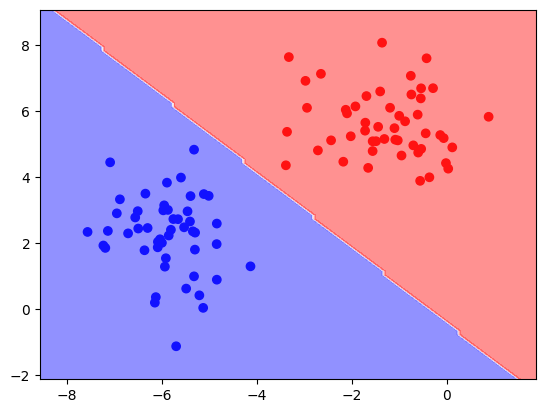

In [45]:
# Inicialização dos pesos e bias
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = 2*random() - 1
learning_rate = 1e-1  # Aumentei a taxa de aprendizagem

print(f'w inicial: {w}')
print(f'b inicial: {b}')

# Loop de treinamento
for step in range(100):  # Aumentei o número de iterações
    cost = 0
    for x_n, y_n in zip(x, y):
        y_sum = sum([x_i * w_i for x_i, w_i in zip(x_n, w)]) + b
        y_pred = 1 if y_sum > 0 else 0
        
        erro = y_n - y_pred
        
        w = [w_i + learning_rate * erro * x_i for x_i, w_i in zip(x_n, w)]
        b = b + learning_rate * erro

        cost += erro**2
    if step % 10 == 0:
        print(f'step {step}: {cost}')

print(f'w final: {w}')
print(f'b final: {b}')
print(f'Predições: {np.dot(x, np.array(w)) + b > 0}')

plot_linear_classifier(x, y, w, b)

numpy

w inicial: [0.16254927 0.49474581]
b inicial: 0.8389513922868925
step 0: 5
step 10: 0
step 20: 0
step 30: 0
step 40: 0
step 50: 0
step 60: 0
step 70: 0
step 80: 0
step 90: 0
w final: [1.38796735 1.11706485]
b final: 0.8389513922868925
Predições: [ True False False  True  True False  True False  True  True False  True
 False False False False  True  True False  True False  True  True  True
 False  True False  True  True  True  True  True False False False  True
  True  True False False False False False  True False  True  True  True
 False  True  True False False False False  True  True  True  True  True
  True False  True  True  True False False  True False  True False False
  True False False  True False  True False  True False False False False
  True False  True False  True  True  True False False False False False
  True  True False False]


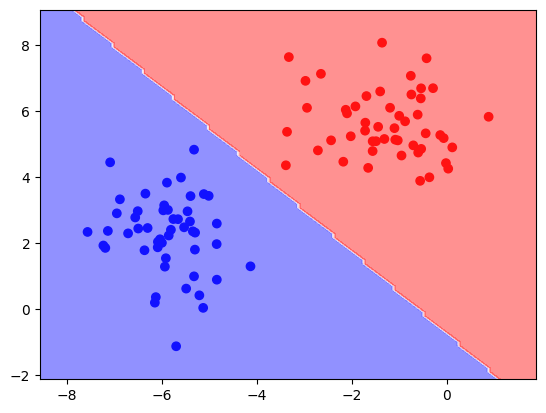

In [46]:
D = x.shape[1]
w = 2 * np.random.random(size=D)-1
b = 2 * np.random.random()-1
learning_rate = 1e-1  

print(f'w inicial: {w}')
print(f'b inicial: {b}')

for step in range(100): 
    cost = 0
    for x_n, y_n in zip(x, y):
        y_sum = np.dot(x_n, w) + b
        y_pred = np.where(y_sum > 0, 1, 0)
        
        erro = y_n - y_pred

        w = w + learning_rate * np.dot(erro, x_n)
        b = b + learning_rate * erro

        cost += erro**2
    if step % 10 == 0:
        print(f'step {step}: {cost}')

print(f'w final: {w}')
print(f'b final: {b}')
print(f'Predições: {np.dot(x, np.array(w)) + b > 0}')

plot_linear_classifier(x, y, w, b)

Regreção linear

In [47]:
df = pd.read_csv('data/medidas.csv')
print(df.shape)
df.head(10)

(100, 2)


,Altura,Peso
0,187,109.72
1,177,91.09
2,180,88.93
3,177,89.39
4,177,92.02
5,183,94.70
6,178,83.57
7,177,85.19
8,183,92.96
9,188,108.21


Text(0, 0.5, 'Peso')

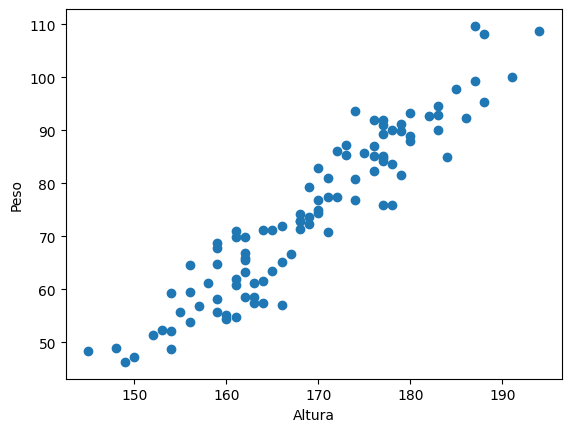

In [48]:
x = df.Altura.values
y = df.Peso.values

plt.figure()
plt.scatter(x, y)
plt.xlabel('Altura')

plt.ylabel('Peso')

In [49]:
print(x.shape, y.shape)

x = x.reshape(-1, 1)

print(x.shape, y.shape)

(100,) (100,)
(100, 1) (100,)


python

In [50]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = 2*random() - 1

for step in range(10001):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = sum([x_i*w_i for x_i, w_i in zip(x_n, w)]) + b
        error = y_n - y_pred
        w = [w_i + 1e-7*error*x_i for x_i, w_i in zip(x_n, w)]
        b = b + 1e-2*error
        cost += error**2

    if step%1000 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

step 0: 260449.16016894314


step 1000: 3188.3070213520487
step 2000: 2721.059205800206
step 3000: 2641.0558816924595
step 4000: 2627.9238907320287
step 5000: 2626.0128153024743
step 6000: 2625.8447557291715
step 7000: 2625.8858637401054
step 8000: 2625.922773351584
step 9000: 2625.9417242419286
step 10000: 2625.950286544387
w:  [1.3698972132900444]
b:  -157.89772902679573


Numpy

In [51]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1 

for step in range(10001):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b 
        error = y_n - y_pred
        w = w +  1e-7*np.dot(error, x_n)
        b = b + 1e-2*error
        cost += error**2
    
    if step%1000 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)

step 0: 23902.137565771376
step 1000: 4591.819505594783
step 2000: 2964.851943827111
step 3000: 2682.57469280065
step 4000: 2634.6422437440833
step 5000: 2626.9470018253505
step 6000: 2625.904806350936
step 7000: 2625.852602082454
step 8000: 2625.8985200691877
step 9000: 2625.929733471588
step 10000: 2625.9449354051544
w:  [1.36981852]
b:  -157.8845846670279


Como observado no codigo a cima é necessario ter 2 tipos de learning rate pois os dados não estão normalizados

In [52]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(), x.max())

-1.0 0.9999999999999991


In [53]:
reg = LinearRegression()
reg.fit(x,y)

print('w: ', reg.coef_)
print('b: ', reg.intercept_)

w:  [33.60164767]
b:  74.99636286981102


In [54]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1 

learning_rate = 1.0

for step in range(1001):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b 
        error = y_n - y_pred
        w = w + learning_rate*np.dot(error, x_n)
        b = b + learning_rate*error
        cost += error**2
    
    if step%100 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)

step 0: 20048.796378460876
step 100: 5243.0328992498735
step 200: 5243.0328992498735
step 300: 5243.0328992498735
step 400: 5243.0328992498735
step 500: 5243.0328992498735
step 600: 5243.0328992498735
step 700: 5243.0328992498735
step 800: 5243.0328992498735
step 900: 5243.0328992498735
step 1000: 5243.0328992498735
w:  [30.78283154]
b:  69.80566068168456


Exercicio de regreção linear

In [55]:
df = pd.read_csv('data/notas.csv')

print(df.shape)
df.head(10)

(25, 4)


,prova1,prova2,prova3,final
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


Text(0, 0.5, 'Final')

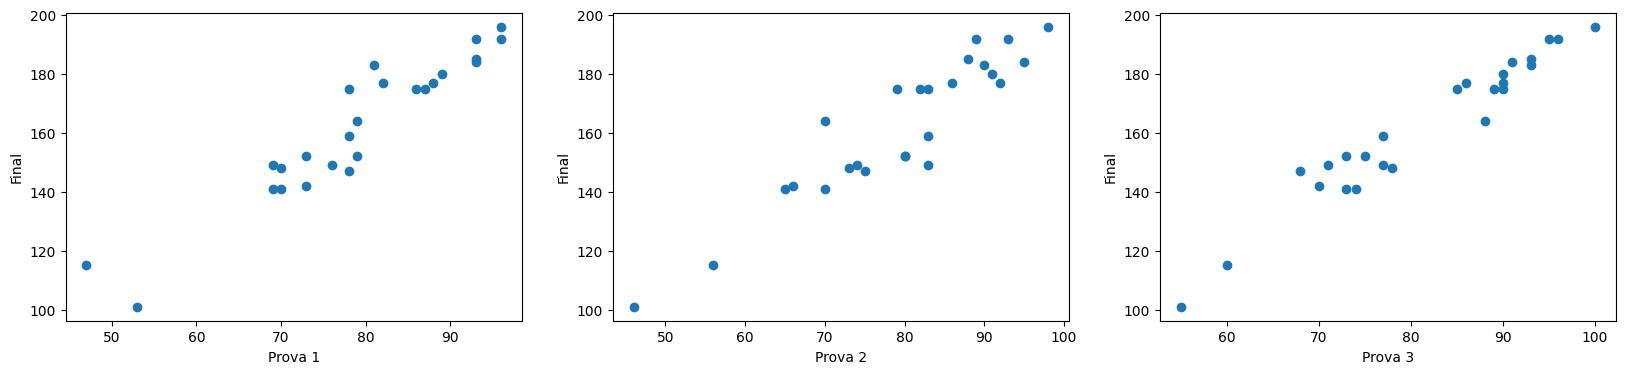

In [56]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 3, 1)
plt.scatter(df.prova1.values, df.final.values)
plt.xlabel('Prova 1')
plt.ylabel('Final')

plt.subplot(1, 3, 2)
plt.scatter(df.prova2.values, df.final.values)
plt.xlabel('Prova 2')
plt.ylabel('Final')

plt.subplot(1, 3, 3)
plt.scatter(df.prova3.values, df.final.values)
plt.xlabel('Prova 3')
plt.ylabel('Final')

In [57]:
x = df[['prova1', 'prova2', 'prova3']].values
y = df['final'].values

print(x.shape, y.shape)

(25, 3) (25,)


In [58]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

In [59]:
reg = LinearRegression()
reg.fit(x, y)

print('w: ', reg.coef_)
print('b: ', reg.intercept_)

w:  [ 8.72048636 14.1054877  26.26749487]
b:  150.65175754349872


Python

In [60]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = 2*random() - 1

learning_rate = 1e-2 

for step in range(1000): 
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = sum([x_i*w_i for x_i, w_i in zip(x_n, w)]) + b
        error = y_n - y_pred
        w = [w_i + learning_rate*error*x_i for x_i, w_i in zip(x_n, w)]
        b = b + learning_rate*error
        cost += error**2
        
    if step%200 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

step 0: 500865.78323549434
step 200: 173.05975978099815
step 400: 148.20998831026515
step 600: 146.37943503468264
step 800: 146.17841719912505
w:  [8.792769746080143, 14.097364826501376, 26.293281867999294]
b:  150.70739006459291


Numpy

In [61]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1       

learning_rate = 1e-2 

for step in range(1000):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b 
        error = y_n - y_pred
        w = w + learning_rate*np.dot(error, x_n)
        b = b + learning_rate*error
        cost += error**2
    
    if step%200 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)

step 0: 502588.4521875975
step 200: 175.21713601744275
step 400: 148.4533254555433
step 600: 146.40969918244548
step 800: 146.1822263652901
w:  [ 8.79717036 14.09453621 26.29158614]
b:  150.70715407858543
